In [ ]:

import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('omw-1.4')
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"
import os
import regex

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
import pandas as pd

data = []

# Set the path to the data directory
data_path = Path("/content/drive/MyDrive/Data")

# Iterate over the folders in the data directory
for folder in data_path.iterdir():
    if not folder.is_dir():
        continue
    # print(folder.name)

    # Get a list of files in the folder
    files = [f for f in folder.iterdir() if f.is_file()]

    # Iterate over the files in the folder
    for file in files:
        # Use a context manager to open the file
        with file.open("rb") as f:
            contents = f.read().decode("ISO-8859-1")
            data.append([file.stem, folder.name, contents])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["ID", "Category", "Content"])

# Write the DataFrame to a CSV file
df.to_csv("/content/combine.csv", index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/combine.csv")

# Print the DataFrame
print(df)


         ID       Category                                            Content
0     15978  Entertainment  \r\nIn article <1993Apr23.183655.13710@ulysses...
1     15870  Entertainment  \r\n\r\nOK, I heard a lot of talk about the NS...
2     15946  Entertainment  \r\nIn article <tcmayC5z3yE.F38@netcom.com> tc...
3     15746  Entertainment  Message-ID: <0fpiZBG00WC70qOKYw@andrew.cmu.edu...
4     16001  Entertainment  \r\nIn article <C5wDFo.327@demon.co.uk>, \r\nG...
...     ...            ...                                                ...
9149  54235        Science  \r\nKuo-Sheng (Kasey) Chang (kschang@sfsuvax1....
9150  16353        Science  \r\n  I was wondering if anyone knew of where ...
9151  52826        Science  \r\nIf you're thinking of reactive polymers th...
9152  59195        Science  \r\n\r\nHi:\r\n\r\nI went to the orthopedist o...
9153  15431        Science  \r\n\r\nThe system, or 'family', key would app...

[9154 rows x 3 columns]


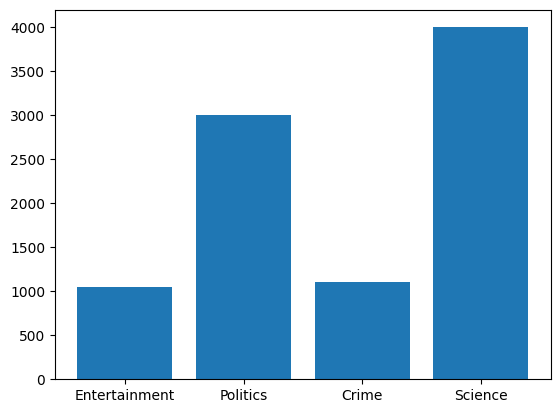

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data_file = pd.read_csv("/content/combine.csv")

# Get the unique categories and count the number of occurrences
categories = data_file["Category"]
category_count = {}
for category in categories:

    if category in category_count:
        category_count[category] += 1
    else:
        category_count[category] = 1

# Plot a bar chart of the category count
categories_name=category_count.keys()
categories_values=category_count.values()
plt.bar(categories_name, categories_values)
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import re

# Define the stop words and WordNetLemmatizer
en_stopwords = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Remove non-alphabetic characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    cleaned_sentences = []
    # Loop through each sentence
    for sentence in sentences:
        # Tokenize the sentence into words and POS tag them
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        cleaned_words = []
        # Loop through each word and its POS tag
        for word, tag in tagged_words:
            # Remove stop words and lemmatize the words based on their POS tag
            if word not in en_stopwords:
                if tag.startswith('N'):
                    cleaned_word = word_lemmatizer.lemmatize(word, pos='n')
                elif tag.startswith('V'):
                    cleaned_word = word_lemmatizer.lemmatize(word, pos='v')
                elif tag.startswith('R'):
                    cleaned_word = word_lemmatizer.lemmatize(word, pos='r')
                else:
                    cleaned_word = word_lemmatizer.lemmatize(word)
                cleaned_words.append(cleaned_word)
        # Join the cleaned words back into a sentence
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)
    # Join the cleaned sentences back into a single string
    cleaned_text = ' '.join(cleaned_sentences)
    return cleaned_text

# Define a function to tokenize the content column
def tokenize_content(content):
    return clean_text(content)

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/combine.csv")

# Tokenize the content column and add the results to a new column
df['tokenized_word_w_stopwords'] = df['Content'].apply(tokenize_content)

# Print the DataFrame
# df=df.drop(columns=["Content"])
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


         ID       Category                                            Content  \
0     15978  Entertainment  \r\nIn article <1993Apr23.183655.13710@ulysses...   
1     15870  Entertainment  \r\n\r\nOK, I heard a lot of talk about the NS...   
2     15946  Entertainment  \r\nIn article <tcmayC5z3yE.F38@netcom.com> tc...   
3     15746  Entertainment  Message-ID: <0fpiZBG00WC70qOKYw@andrew.cmu.edu...   
4     16001  Entertainment  \r\nIn article <C5wDFo.327@demon.co.uk>, \r\nG...   
...     ...            ...                                                ...   
9149  54235        Science  \r\nKuo-Sheng (Kasey) Chang (kschang@sfsuvax1....   
9150  16353        Science  \r\n  I was wondering if anyone knew of where ...   
9151  52826        Science  \r\nIf you're thinking of reactive polymers th...   
9152  59195        Science  \r\n\r\nHi:\r\n\r\nI went to the orthopedist o...   
9153  15431        Science  \r\n\r\nThe system, or 'family', key would app...   

                           

In [ ]:
def join_(content):
    return ' '.join(map(str, content))

crime_text = join_(df[df['Category'] == 'Crime']['tokenized_word_w_stopwords'].values)
entertainment_text = join_(df[df['Category'] == 'Entertainment']['tokenized_word_w_stopwords'].values)
politics_text = join_(df[df['Category'] == 'Politics']['tokenized_word_w_stopwords'].values)
science_text = join_(df[df['Category'] == 'Science']['tokenized_word_w_stopwords'].values)


In [ ]:
def wordcloud(content):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    min_font_size = 10).generate(content)
    return wordcloud

In [ ]:
fig, axos = plt.subplots(1, 4, figsize= (32,16), facecolor= None)

science_wordcloud = wordcloud(science_text)

crime_wordcloud = wordcloud(crime_text)


entertainment_wordcloud = wordcloud(entertainment_text)
politics_wordcloud = wordcloud(politics_text)

clouds=[science_wordcloud,entertainment_wordcloud,crime_wordcloud,politics_wordcloud]
cloud_title=["science_wordcloud","entertainment_wordcloud","crime_wordcloud","politics_wordcloud"]
for i in range(0,4):
    axos[i].imshow(clouds[i])
    axos[i].set_title(cloud_title[i],size=20)
    axos[i].axis("off")


In [ ]:
df.drop_duplicates(subset=['ID', 'Content'], inplace=True, keep=False)
updated_count=df['Category'].value_counts()
df=df.drop(columns=["Content"])
category_arr=updated_count.index
value_arr=updated_count.values
plt.bar(category_arr, value_arr)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

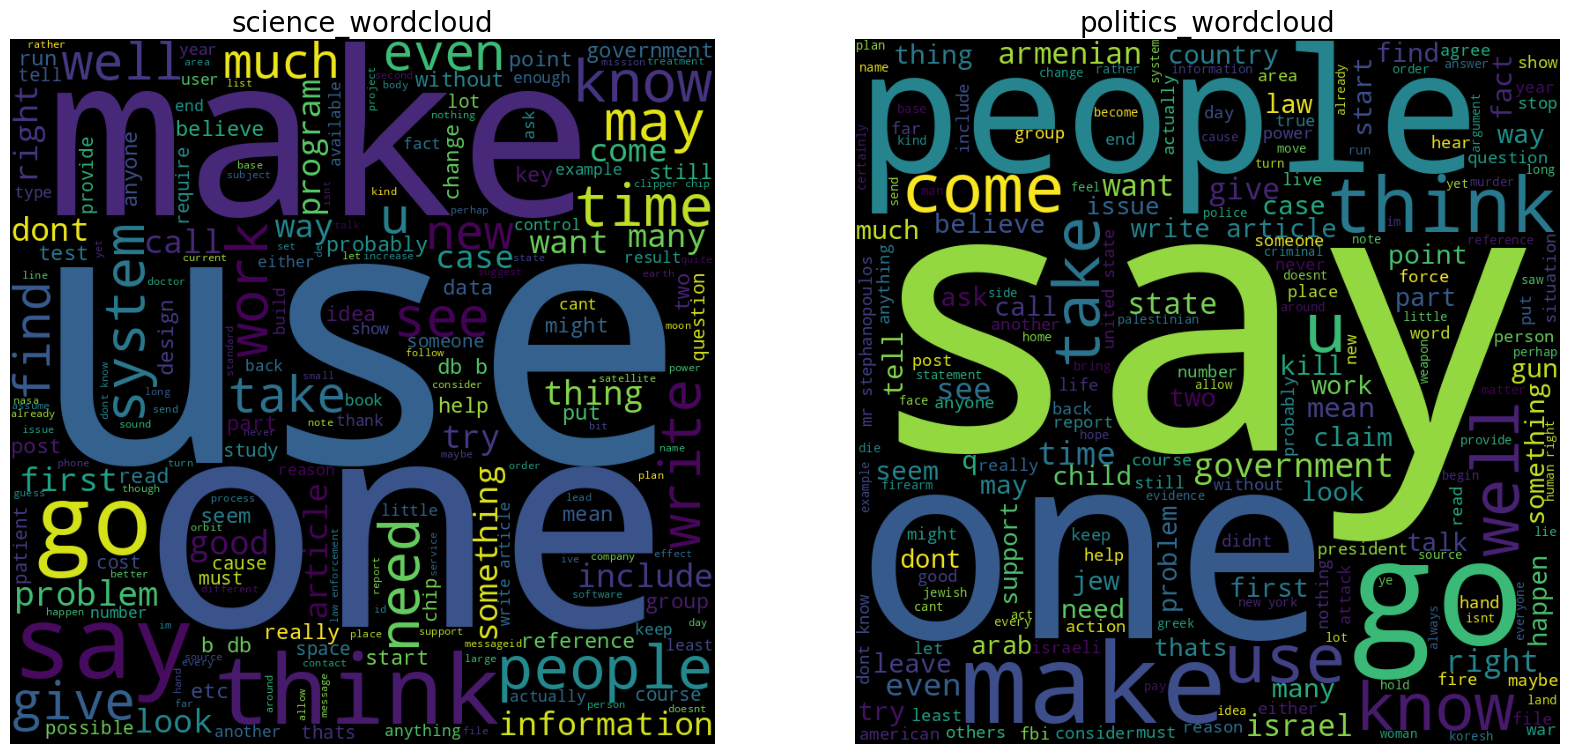

In [ ]:
fig, axos = plt.subplots(1, 2, figsize= (20,16))
science_text = df[df['Category'] == 'Science']['tokenized_word_w_stopwords'].values
science_text = join_(science_text)
politics_text = df[df['Category'] == 'Politics']['tokenized_word_w_stopwords'].values
politics_text = join_(politics_text)
clouds=[science_wordcloud,politics_wordcloud]
cloud_title=["science_wordcloud","politics_wordcloud"]
for i in range(0,2):
    axos[i].imshow(clouds[i])
    axos[i].set_title(cloud_title[i],size=20)
    axos[i].axis("off")

In [ ]:
import numpy as np

# Calculate average word count for "Science" category
# print(df[df["Category"] == "Science"]["tokenized_word_w_stopwords"])
science_avg_word_count = np.mean([len(email.split()) for email in df[df["Category"] == "Science"]["tokenized_word_w_stopwords"].values])
print("Average word count in science email is:", int(science_avg_word_count))

# Calculate average word count for "Politics" category
politics_avg_word_count = np.mean([len(email.split()) for email in df[df["Category"] == "Politics"]["tokenized_word_w_stopwords"]])
print("Average word count in politics email is:", int(politics_avg_word_count))


Average word count in science email is: 134
Average word count in politics email is: 204


In [ ]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the emails into a DataFrame
emails_df = pd.read_csv('combine.csv')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score of a text
def compute_sentiment_score(text):
    # Use the VADER library to compute the sentiment score
    sentiment_scores = sid.polarity_scores(text)
    # Extract the compound score, which ranges from -1 (negative) to 1 (positive)
    return sentiment_scores['compound']

# Compute the sentiment score for each email and store it in a new column
emails_df['sentiment_score'] = df['tokenized_word_w_stopwords'].apply(compute_sentiment_score)

# Save the DataFrame as a CSV file
emails_df.to_csv('emails_sentiment.csv', index=False)
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your dataset is stored in a pandas DataFrame called `df`
# with columns `email_text` and `sentiment_score`

# create a pivot table with mean sentiment score for each email class
pivot_table = emails_df.pivot_table(values='sentiment_score', index='Category', aggfunc='mean')

# create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Sentiment Scores by Email Class')
plt.show()



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Find the minimum count of any category
min_count = df['Category'].value_counts().min()

# Resample each category to have the same number of rows as the minimum count
resampled_dfs = []
for cat in df['Category'].unique():
    cat_df = df[df['Category'] == cat]
    resampled_cat_df = resample(cat_df, replace=False, n_samples=min_count, random_state=42)
    resampled_dfs.append(resampled_cat_df)

# Combine the resampled DataFrames into a single balanced DataFrame
balance_df = pd.concat(resampled_dfs)

# Shuffle the rows of the new DataFrame
balance_df = balance_df.sample(frac=1, random_state=42).reset_index(drop=True)

# print(balance_df)
# Split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balance_df['tokenized_word_w_stopwords'], balance_df['Category'], test_size=0.2, random_state=42)

# Transform the text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Use the transformed features as input to a machine learning model
# For example, a logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_vec, y_train)
testemail= LogisticRegression(random_state=42)
testemail.fit(X_train_vec, y_train)
# Calculate accuracy on the testing set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_vec)
# vectorizer = TfidfVectorizer()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression:", accuracy)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 1', 'Class 2'],
            yticklabels=['Class 1', 'Class 2'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from nltk.corpus.reader.wordlist import WordListCorpusReader
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# Load data
email = df['tokenized_word_w_stopwords']# list of email texts
email=email.values
vectorize = TfidfVectorizer()
X = vectorize.fit_transform(email)

# Find optimal number of clusters using elbow method
wscore = []
init_value=10
num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in num:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=init_value, random_state=0)
    kmeans.fit(X)
    wscore.append(kmeans.inertia_)

# Plot elbow curve
fig, ax = plt.subplots()
ax.scatter(num, wscore, s=100)
ax.set_xlabel('No of clusters')
ax.set_ylabel('WCSS')
ax.set_title('Elbow Method')
ax.plot(num, wscore)
plt.show()


# Cluster emails using optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Visualize clusters using PCA
X=X.toarray()
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
labels = kmeans.predict(X)

# Plot scatter plot with legend
fig, ax = plt.subplots()
colors = ['red', 'blue',"green","violet","yellow"]
for i in range(5):
    mask = labels == i
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], label=f'Cluster {i+1}')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('K-Means Clustering (n_clusters=5)')
ax.legend()
plt.show()


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_vec, y_train);
score = clf.score(X_test_vec, y_test)
print('Accuracy:', score)
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
y_pred = clf.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 1', 'Class 2'],
            yticklabels=['Class 1', 'Class 2'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()


In [ ]:
# Training the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define and train KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_vec, y_train)

# Evaluate accuracy on test set
y_pred = neigh.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy for KNN Classifier:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 1', 'Class 2'],
            yticklabels=['Class 1', 'Class 2'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

# fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_vec, y_train_encoded)

# Predict on the test set
y_pred_encoded = model.predict(X_test_vec)

# transform the predictions and true labels back to original categories
y_pred = le.inverse_transform(y_pred_encoded)
y_test = le.inverse_transform(y_test_encoded)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 1', 'Class 2'],
            yticklabels=['Class 1', 'Class 2'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()


In [ ]:
manual_text=["I hope this email finds you well. I wanted to bring to your attention the recent policy changes proposed by our government regarding healthcare. As someone who is passionate about healthcare and its accessibility to all, I would love to hear your thoughts on the matter.","I hope this email finds you in good spirits. I wanted to express my opinion on the ongoing political unrest in our country. It is important that we come together as a community and work towards a peaceful and just government. Let us not forget the power of unity and the importance of our voices.","I hope this email finds you well. I wanted to share with you the latest findings in the field of environmental science regarding climate change. It is crucial that we take action now to protect our planet and secure a sustainable future for generations to come.","I hope this email finds you in good health. I wanted to inform you about the groundbreaking research in the field of medical science regarding the development of new drugs for cancer treatment. The advancements made are promising and give hope to millions of people affected by this diseases"]
vectorized_email = vectorizer.transform(manual_text)
predicted_class = testemail.predict(vectorized_email)

# Print the predicted class
print("Predicted class:", predicted_class)